In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

In [16]:
df_train = pd.read_csv('/content/drive/MyDrive/Ironhack/Proyecto4/dapt-sept2022/final_train_imputer.csv')

In [17]:
df_test = pd.read_csv('/content/drive/MyDrive/Ironhack/Proyecto4/dapt-sept2022/final_test_imputer.csv')

In [7]:
df_train.columns

Index(['enrollee_id', 'city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours', 'target'],
      dtype='object')

In [6]:
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics
from sklearn.ensemble import AdaBoostRegressor

In [18]:
nb_predictor = ComplementNB().fit(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']], df_train.target)

In [20]:
metrics.roc_auc_score(df_train.target, nb_predictor.predict_log_proba(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])[:,1])

0.6111187275780308

In [36]:
classificator = nb_predictor.predict(df_test[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])
target = nb_predictor.predict_proba(df_test[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])[:,1]

In [44]:
np.argmin(target)

3092

In [38]:
df_threshold = pd.DataFrame()
df_threshold['enrollee_id'] = df_test['enrollee_id']
df_threshold['predictor'] = classificator
df_threshold['target'] = target

In [49]:
df_threshold[['enrollee_id','target']].to_csv('/content/drive/MyDrive/Ironhack/Proyecto4/dapt-sept2022/7.csv', index = False)

In [59]:
metrics.roc_auc_score(df_train.target, nb_predictor.predict_proba(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])[:,1])

0.6111187275780308

In [ ]:
nb_predictor.predict(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])[[:,1]]

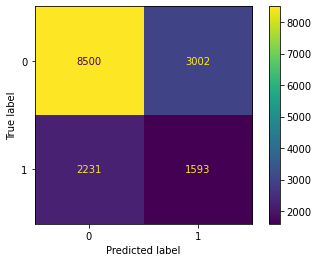

In [47]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(df_train.target, nb_predictor.predict(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']]))).plot()

In [69]:
from sklearn.svm import SVC

In [87]:
svc= SVC()

In [80]:
ada_predictor.base_estimator_

DecisionTreeClassifier(max_depth=1)

In [84]:
df_train.city_development.var()

0.015047465292783125

In [82]:
ada_predictor.feature_importances_

array([0.54333333, 0.13133333, 0.08933333, 0.18466667, 0.05133333])

In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [89]:
ada_predictor = AdaBoostClassifier(n_estimators=150000, learning_rate= 0.01,
                                   random_state= 12, algorithm= 'SAMME').fit(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']], df_train.target)

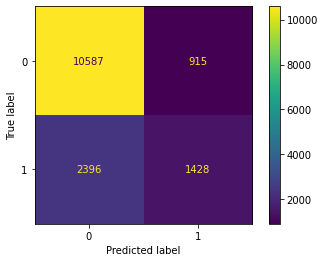

In [56]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(df_train.target, ada_predictor.predict(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']]))).plot()

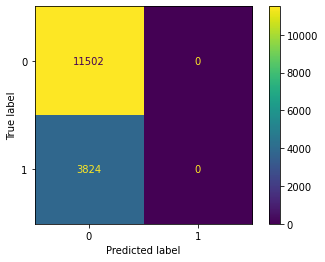

In [90]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(df_train.target, ada_predictor.predict(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']]))).plot()

In [91]:
ada=ada_predictor.predict_proba(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])[:,1]

In [67]:
metrics.roc_auc_score(df_train.target, ada_predictor.predict(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']]))

0.6454600809828235

In [77]:
metrics.roc_auc_score(df_train.target, ada_predictor.predict_proba(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])[:,1])

0.7614259281085552

In [92]:
metrics.roc_auc_score(df_train.target, ada)

0.5

In [61]:
df_threshold = pd.DataFrame()
target = ada_predictor.predict_proba(df_test[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])[:,1]
df_threshold['enrollee_id'] = df_test['enrollee_id']
df_threshold['target'] = target

In [62]:
df_threshold[['enrollee_id','target']].to_csv('/content/drive/MyDrive/Ironhack/Proyecto4/dapt-sept2022/8.csv', index = False)

In [3]:
df_8 = pd.read_csv('/content/drive/MyDrive/Ironhack/Proyecto4/dapt-sept2022/8.csv')

In [11]:
df_8.enrollee_id= df_8.enrollee_id.astype('int32')

In [14]:
df_8.to_csv('/content/drive/MyDrive/Ironhack/Proyecto4/dapt-sept2022/8.csv', index = False)

In [15]:
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier

In [22]:
from sklearn.ensemble import VotingClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
from sklearn.naive_bayes import GaussianNB

In [46]:
nb_gaussin = GaussianNB()
ada_boost = AdaBoostClassifier(n_estimators=10000, learning_rate= 0.01,
                                   random_state= 12)
random_f = RandomForestClassifier(n_estimators=10000)

In [26]:
list_models = [nb_gaussin,ada_boost,random_f]

In [47]:
voting_1 = VotingClassifier(estimators= [('nb',nb_gaussin),('ada', ada_boost),('rf',random_f)], voting = 'soft')

In [29]:
df_train.columns

Index(['enrollee_id', 'city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours', 'target'],
      dtype='object')

In [48]:
voting_1.fit(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']], df_train.target)

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('ada',
                              AdaBoostClassifier(learning_rate=0.01,
                                                 n_estimators=10000,
                                                 random_state=12)),
                             ('rf',
                              RandomForestClassifier(n_estimators=10000))],
                 voting='soft')

In [50]:
metrics.roc_auc_score(df_train.target,voting_1.predict_proba(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])[:,1])

0.913895409494001

In [51]:
target_voting= voting_1.predict_proba(df_test[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])[:,1]

In [52]:
df_voting = pd.DataFrame()
df_voting['enrollee_id']= df_test['enrollee_id'].astype('int32')
df_voting['target'] = target_voting

In [55]:
df_voting.to_csv('/content/drive/MyDrive/Ironhack/Proyecto4/dapt-sept2022/9.csv', index = False)

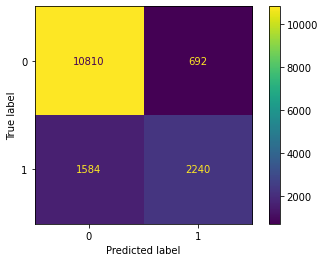

In [56]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(df_train.target, voting_1.predict(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']]))).plot()

In [59]:
df_train.target[df_train.target == 1].count()

3824

In [68]:
np.argmax(df_voting.target[df_voting.target <= df_voting.target.quantile(0.24)])

690